In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/CV_FinalProject/Dungmn/coco-caption/
print("===============")
!ls 

Mounted at /gdrive
/gdrive/.shortcut-targets-by-id/1rvVQN848IG4yYS2DU7AHiKiDnungjDoK/CV_FinalProject/Dungmn/coco-caption
annotations		get_stanford_models.sh	pycocoevalcap  results
cocoEvalCapDemo.ipynb	license.txt		pycocotools    setup.py
get_stanford_models.py	MANIFEST.in		README.md


In [ ]:
# !git clone https://github.com/flauted/coco-caption.git

#Setup

In [ ]:
!pip install torchvision==0.4.0
!pip install pillow==6.1
# !pip install underthesea
# !pip install pyvi

     |████████████████████████████████| 8.8MB 3.7MB/s 
     |████████████████████████████████| 748.9MB 21kB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 2.1MB 5.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


#Evaluation

In [ ]:
%matplotlib inline
from __future__ import print_function
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')
!sh get_stanford_models.sh

Found Stanford CoreNLP.


#Validation

In [ ]:
#Validation
result_path = '/gdrive/MyDrive/CV_FinalProject/Dungmn/result/'
annFile = '/gdrive/MyDrive/CV_FinalProject/Dungmn/Data/UIT-ViIC/uitviic_captions_val2017.json'
resFile = result_path + 'preprocessed_val_result_Resnet512_LSTM_pyvi.json'

In [ ]:
# create coco object and cocoRes object
coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...
0:00:02.551004
creating index...
index created!
Loading and preparing results...     
DONE (t=0.49s)
creating index...
index created!


In [ ]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params['image_id'] = cocoRes.getImgIds()

# evaluate results
# SPICE will take a few minutes the first time, but speeds up due to caching
cocoEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 10929, 'reflen': 10785, 'guess': [10929, 10005, 9081, 8157], 'correct': [7186, 4215, 2542, 1585]}
ratio: 1.0133518776076946
Bleu_1: 0.658
Bleu_2: 0.526
Bleu_3: 0.426
Bleu_4: 0.350
computing Rouge score...
ROUGE_L: 0.578
computing CIDEr score...
CIDEr: 0.924


#Test


In [ ]:
#TEST
result_path = '/gdrive/MyDrive/CV_FinalProject/Dungmn/result/'
annFile = '/gdrive/MyDrive/CV_FinalProject/Dungmn/Data/UIT-ViIC/preprocessed_uitviic_captions_test2017.json'
resFile = result_path + 'Test_AttentionResnet152_LSTM_v4.json'

In [ ]:
ls "$result_path" -t

Test_AttentionResnet152_LSTM_v4.json
Test_AttentionResnet152_LSTM_v3.json
predict_on_test_data_efficientb4_v3.json
Test_AttentionResnet152_LSTM_v2.json
predict_on_test_data_efficientb4_v2.json
predict_on_test_data_efficientb4.json
Test_AttentionResnet152_LSTM_v1.json
predict_on_test_data_inceptionv3.json
Test_AttentionResnet152_TF_v6.json
Test_AttentionResnet152_TF_v5.json
Test_AttentionResnet152_TF_v4.json
Test_AttentionResnet152_TF_v3.json
Test_AttentionResnet152_TF_v2.json
Test_AttentionResnet152_TF.json
Test_Attention_TF.json
preprocessed_test_result_Resnet512_LSTM_pyvi.json
preprocessed_val_result_Resnet512_LSTM_pyvi.json
test_result_Resnet512_LSTM_pyvi.json
val_result_Resnet512_LSTM_pyvi.json
test_result_Resnet512_LSTM_1e4.json
result_Resnet512_LSTM_1e4.json
result_Resnet512_LSTM.json


In [ ]:
# create coco object and cocoRes object
coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...
0:00:01.165136
creating index...
index created!
Loading and preparing results...     
DONE (t=0.27s)
creating index...
index created!


In [ ]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params['image_id'] = cocoRes.getImgIds()

# evaluate results
# SPICE will take a few minutes the first time, but speeds up due to caching
cocoEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 2755, 'reflen': 2684, 'guess': [2755, 2524, 2293, 2062], 'correct': [1539, 872, 497, 280]}
ratio: 1.0264530551411972
Bleu_1: 0.559
Bleu_2: 0.439
Bleu_3: 0.347
Bleu_4: 0.275
computing Rouge score...
ROUGE_L: 0.488
computing CIDEr score...
CIDEr: 0.584


In [ ]:
# print output evaluation scores
for metric, score in cocoEval.eval.items():
    print('%s: %.3f'%(metric, score))

Bleu_1: 0.533
Bleu_2: 0.409
Bleu_3: 0.319
Bleu_4: 0.253
ROUGE_L: 0.461
CIDEr: 0.535


ground truth captions
Vận động viên tennis đang cầm vợt tennis chuẩn bị giao bóng .
Vận động viên tennis đang cầm vợt nhồi bóng trên sân .
Vận động viên tennis đang đứng ngoài biên nhồi bóng .
Một người đang cầm vợt tennis chơi trên sân .
Một vận động viên đang cầm vợt tennis thi đấu trên sân .


generated caption (CIDEr score 0.8)
vận <unk> viên tennis đang cầm vợt đứng trên sân đánh bóng .


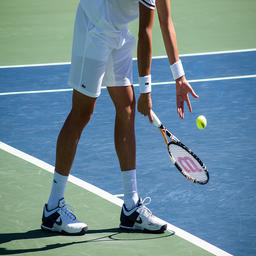

In [ ]:
from PIL import Image
# demo how to use evalImgs to retrieve low score result
evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']<30]
print('ground truth captions')
imgId = evals[0]['image_id']
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
for ann in anns:
    print(ann['caption'])


print('\n')
print('generated caption (CIDEr score %0.1f)'%(evals[0]['CIDEr']))
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
for ann in anns:
    print(ann['caption'])

img = coco.loadImgs(imgId)[0]
Image.open(f"/gdrive/MyDrive/CV_FinalProject/Dungmn/Data/UIT-ViIC/val_imgs_resized/{img['file_name']}")

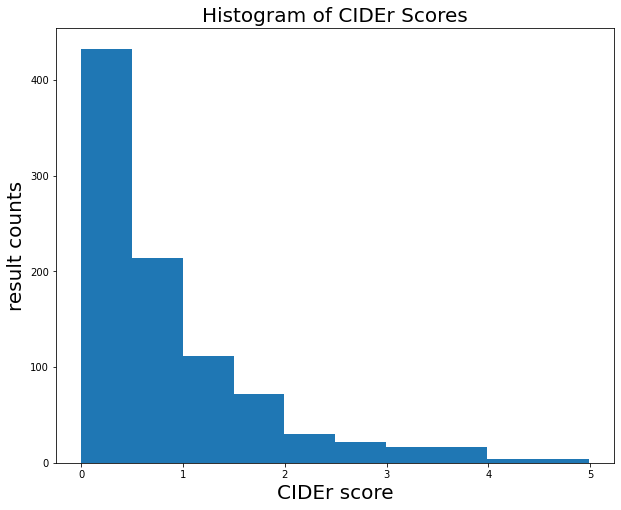

In [ ]:
# plot score histogram
ciderScores = [eva['CIDEr'] for eva in cocoEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

#Demo

In [ ]:
!python sample.py --image '$img_test' \
--encoder_path models/encoder-9-20.ckpt \
--decoder_path models/decoder-9-20.ckpt \
--vocab_path data/vocabUIT.pkl \



2021-01-27 03:08:38.251673: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
<start> những đứa trẻ đang chơi bóng đá trên sân . <end>


In [ ]:
ls data/train2014/ -1 |head -5

COCO_train2014_000000000025.jpg
COCO_train2014_000000000030.jpg
COCO_train2014_000000000034.jpg
COCO_train2014_000000000036.jpg
COCO_train2014_000000000061.jpg


In [ ]:
%cd /gdrive/MyDrive/CV_FinalProject/Dungmn/

/gdrive/.shortcut-targets-by-id/1rvVQN848IG4yYS2DU7AHiKiDnungjDoK/CV_FinalProject/Dungmn


In [ ]:
!git clone https://github.com/tylin/coco-caption.git

Cloning into 'coco-caption'...
remote: Enumerating objects: 736, done.
remote: Total 736 (delta 0), reused 0 (delta 0), pack-reused 736
Receiving objects: 100% (736/736), 130.04 MiB | 27.18 MiB/s, done.
Resolving deltas: 100% (390/390), done.
Checking out files: 100% (47/47), done.
